In [ ]:
!pip install pyod
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [ ]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep='\s+')

data.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [ ]:
data.shape

# number 0 represent the rows and 1 is for columns
print('data has a cardinality size {}'.format(data.shape[0]) + 
      ' and dimensionality size {}'.format(data.shape[1]))

data has a cardinality size 397 and dimensionality size 9


In [ ]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   car name      397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [ ]:
data = data.drop(columns=['car name'])

In [ ]:
data.horsepower.unique() 

array(['165.0', '150.0', '140.0', '198.0', '220.0', '215.0', '225.0',
       '190.0', '170.0', '160.0', '95.00', '97.00', '85.00', '88.00',
       '46.00', '87.00', '90.00', '113.0', '200.0', '210.0', '193.0', '?',
       '100.0', '105.0', '175.0', '153.0', '180.0', '110.0', '72.00',
       '86.00', '70.00', '76.00', '65.00', '69.00', '60.00', '80.00',
       '54.00', '208.0', '155.0', '130.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
data[data['horsepower']== '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
31,25.0,4,98.0,?,2046.0,19.0,71,1
125,21.0,6,200.0,?,2875.0,17.0,74,1
329,40.9,4,85.0,?,1835.0,17.3,80,2
335,23.6,4,140.0,?,2905.0,14.3,80,1
353,34.5,4,100.0,?,2320.0,15.8,81,2
373,23.0,4,151.0,?,3035.0,20.5,82,1


In [ ]:
data.horsepower = pd.to_numeric(data.horsepower.replace('?', np.nan))

In [ ]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
data = data.copy()

data = data.interpolate(method="linear")

data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
data_final = data.copy()

#X = pd.DataFrame(data_final, columns=data_final.columns)
#X = X.drop(columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'model year', 'origin' ])
X = pd.DataFrame(data_final.weight)
y = pd.DataFrame(data_final.mpg)

In [ ]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from pyod.models.knn import KNN
from pyod.utils.example import visualize

In [ ]:
# Initiate a KNN model
KNN_model = KNN(contamination=0.05)
# Fit the model to the whole dataset
KNN_model.fit(data)
# Find the labels
outlier_labels = KNN_model.labels_
# Find the number of outliers
number_of_outliers = len(outlier_labels[outlier_labels == 1])
print(number_of_outliers)

20


In [ ]:
def model_fit(model, data, column='mpg'):
    
    anom_data = data.copy()
    data_to_predict = anom_data[column].to_numpy().reshape(-1, 1)
    predictions = model.fit_predict(data_to_predict)
    anom_data['Predictions'] = predictions
    
    return anom_data
    

In [ ]:
def plot_anom(anom_data, x='weight', y='mpg'):

    # categories will be having values from 0 to n
    # for each values in 0 to n it is mapped in colormap
    categories = anom_data['Predictions'].to_numpy()
    colormap = np.array(['g', 'r'])

    f = plt.figure(figsize=(12, 4))
    f = plt.scatter(anom_data[x], anom_data[y], c=colormap[categories])
    f = plt.xlabel(x)
    f = plt.ylabel(y)
    f = plt.xticks(rotation=90)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


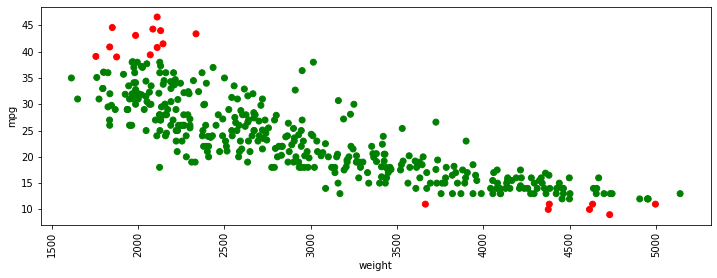

In [ ]:
knn_data = model_fit(KNN_model, data)
plot_anom(knn_data)

In [ ]:
#Removing data points considered anomalies by KNN
knn_data = knn_data.drop(knn_data[knn_data['Predictions'] == 1].index)
knn_data = knn_data.drop(columns=['Predictions'])

# Principle Componant Analysis (PCA) for feature selection

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# initializing standard scaler.
scaler = StandardScaler()     

In [ ]:
  #droping MPG, as it is directly related to mpg_cat


droped_data = knn_data.copy()
output_data = droped_data.loc[:, ['mpg']]
droped_data = droped_data.drop(columns=['mpg'])
# Scaling the PCA
droped_data_scaled = droped_data.copy()
droped_data_scaled[droped_data_scaled.columns] = scaler.fit_transform(droped_data_scaled)

In [ ]:
knn_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1


In [ ]:
# Selecting one component
pca = PCA(n_components=1)

#selecting 3 attributes to get a combination
a_dict = dict()   # dictionary to hold the variance of group of attributes        dict[attributes-name] = 1st PCA comp

# Three attribute group
for i in range (len(droped_data_scaled.columns) - 2):
    for j in range (i+1, len(droped_data_scaled.columns) - 1):
        for k in range (j+1, len(droped_data_scaled.columns) - 0):
            input_cols = [droped_data_scaled.columns[i], droped_data_scaled.columns[j], droped_data_scaled.columns[k]]
            col_str = "" + droped_data_scaled.columns[i] + "," + droped_data_scaled.columns[j] + "," + droped_data_scaled.columns[k]
            pca_strength = pca.fit_transform(droped_data_scaled[input_cols]) # applying the PCA
            variance = np.round(pca.explained_variance_ratio_, decimals=3) * 100 # variance on the first component
            print(col_str,  "=" , variance)
            a_dict[col_str] = variance

cylinders,displacement,horsepower = [93.1]
cylinders,displacement,weight = [94.9]
cylinders,displacement,acceleration = [78.2]
cylinders,displacement,model year = [70.8]
cylinders,displacement,origin = [80.5]
cylinders,horsepower,weight = [90.8]
cylinders,horsepower,acceleration = [78.9]
cylinders,horsepower,model year = [68.3]
cylinders,horsepower,origin = [74.4]
cylinders,weight,acceleration = [74.2]
cylinders,weight,model year = [67.9]
cylinders,weight,origin = [78.5]
cylinders,acceleration,model year = [57.2]
cylinders,acceleration,origin = [61.3]
cylinders,model year,origin = [56.5]
displacement,horsepower,weight = [93.]
displacement,horsepower,acceleration = [81.1]
displacement,horsepower,model year = [70.4]
displacement,horsepower,origin = [77.]
displacement,weight,acceleration = [75.9]
displacement,weight,model year = [69.4]
displacement,weight,origin = [80.5]
displacement,acceleration,model year = [58.6]
displacement,acceleration,origin = [63.3]
displacement,model year,origin 

In [ ]:
import operator
# sorting the dictionary
sorted_dict = {k: v for k, v in sorted(a_dict.items(), key=lambda item: item[1])}
single_a_dict = dict()

count = 0

# using the first 100
for key in sorted_dict:  
    temp = key.split(",")  # key split to see attributes
    for val in temp:       # for each attribute, count how many times it is present in the ammount specified
        if val in single_a_dict:
            single_a_dict[val] += 1
        else:
            single_a_dict[val] = 1
    if count == 20:
        break
    count+=1

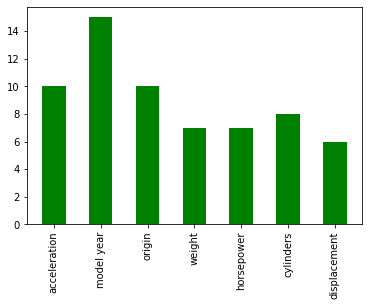

In [ ]:
#Using bargraph to visualise

df = pd.DataFrame([single_a_dict])


plt.xticks(rotation='vertical')
plt.bar(single_a_dict.keys(), single_a_dict.values(), width=0.5, color='g')
value_counts = len(single_a_dict)

In [ ]:
df.head()

,acceleration,model year,origin,weight,horsepower,cylinders,displacement
0,10,15,10,7,7,8,6


In [ ]:
data_items = single_a_dict.items()
data_list = list(data_items)

df = pd.DataFrame(data_list)

In [ ]:
df.head()

,0,1
0,acceleration,10
1,model year,15
2,origin,10
3,weight,7
4,horsepower,7


In [ ]:
df.columns=['key','value']

In [ ]:
value_cut_off_point = 7

df.loc[df['value'] <= value_cut_off_point, 'key']

3          weight
4      horsepower
6    displacement
Name: key, dtype: object

In [ ]:
PCA_remove_count = len(df.loc[df['value'] <= 7, 'key'])
print(PCA_remove_count)

3


In [ ]:
knn_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1


In [ ]:
i = 0
while i < PCA_remove_count:
  x = df.loc[df['value'] <= 7, 'key'].iloc[i]
  knn_data = knn_data.drop(columns=[x])
  i = i + 1

In [ ]:
knn_data.head()

,mpg,cylinders,acceleration,model year,origin
0,15.0,8,11.5,70,1
1,18.0,8,11.0,70,1
2,16.0,8,12.0,70,1
3,17.0,8,10.5,70,1
4,15.0,8,10.0,70,1


## VIF to detect any multicollinearity within dimensionally reduced data set

In [ ]:
import statsmodels.api as stat
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#VIF calculation
VIFcalc = stat.tools.add_constant(knn_data)
S = pd.Series([variance_inflation_factor(VIFcalc.values, i) for i in range(VIFcalc.shape[1])], index=VIFcalc.columns)
print('Output: \n\n{}\n'.format(S))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Output: 

const           620.904929
mpg               3.943828
cylinders         3.399994
acceleration      1.381903
model year        1.595923
origin            1.581284
dtype: float64



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Creating X axis with features for prediction (indipendant variables) and target y for prediction (dependant variable)

In [ ]:
data_final = knn_data.copy()


X = pd.DataFrame(data_final, columns=data_final.columns)
X = X.drop(columns=['mpg'])


y = pd.DataFrame(data_final.mpg)

## Viewing X and y

In [ ]:
X.head()

,cylinders,acceleration,model year,origin
0,8,11.5,70,1
1,8,11.0,70,1
2,8,12.0,70,1
3,8,10.5,70,1
4,8,10.0,70,1


In [ ]:
y.head()

,mpg
0,15.0
1,18.0
2,16.0
3,17.0
4,15.0


## Creating test and train sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.80, 
                                                    random_state=1,
                                                    )
#Converting y_train into 1d array
y_train = y_train.values.ravel()

In [ ]:
print('X_train shape', y_train.shape, 'X_test shape', y_test.shape)

X_train shape (302,) X_test shape (76, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

#libraries for evaluation import
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# Defining model algorithms for regression
LR_model= LinearRegression()
DTR_model = DecisionTreeRegressor(random_state=0)
RFR_model = RandomForestRegressor()
SVR_model =  SVR()
ETR_model = ExtraTreesRegressor()

#Fitting models on the training set, then predicting on the test set

#Linear Regressor
LR_model.fit(X_train, y_train)
LR_predictions = LR_model.predict(X_test)

#Decision Tree Regressor
DTR_model.fit(X_train, y_train)
DTR_predictions = DTR_model.predict(X_test)

#Random Forest Regressor
RFR_model.fit(X_train, y_train)
RFR_predictions = RFR_model.predict(X_test)

#Support Vector Regressor
SVR_model.fit(X_train, y_train)
SVR_predictions = SVR_model.predict(X_test)

#Extra Trees Regressor
ETR_model.fit(X_train, y_train)
ETR_predictions = ETR_model.predict(X_test)

#Evaluation of models

#Linear Regression
print('Linear Regression:')
#R2 score:
print('Linear regression R2 score: {}'.format(r2_score(y_test,LR_predictions)))
#Mean absolute error:
print('Linear regression Mean Absolute Error score: {}'.format(mean_absolute_error(y_test,LR_predictions)))
#Mean squared error score:
print('Linear regression Mean Squared Error score: {}'.format(mean_squared_error(y_test,LR_predictions)))
#Root mean squared error:
print('Linear regression Root Mean Error score: {}'.format(np.sqrt(mean_squared_error(y_test,LR_predictions))))
#Roor mean squared log error:
print('Linear regression Root Mean Squared Log Error score: {}\n'.format(np.sqrt(mean_squared_log_error(y_test,LR_predictions))))


#Decision Tree Regression
print('Decision Tree Regression:')
#R2 score:
print('Decision tree regression R2 score: {}'.format(r2_score(y_test,DTR_predictions)))
#Mean absolute error:
print('Decision tree regression Mean Absolute Error score: {}'.format(mean_absolute_error(y_test,DTR_predictions)))
#Mean squared error score:
print('Decision tree regression Mean Squared Error score: {}'.format(mean_squared_error(y_test,DTR_predictions)))
#Root mean squared error:
print('Decision tree regression Root Mean Error score: {}'.format(np.sqrt(mean_squared_error(y_test,DTR_predictions))))
#Roor mean squared log error:
print('Decision tree regression Root Mean Squared Log Error score: {}\n'.format(np.sqrt(mean_squared_log_error(y_test,DTR_predictions))))

#Random Forest Regression
print('Random Forest Regression:')
#R2 score:
print('Random forest regression R2 score: {}'.format(r2_score(y_test,RFR_predictions)))
#Mean absolute error:
print('Random forest regression Mean Absolute Error score: {}'.format(mean_absolute_error(y_test,RFR_predictions)))
#Mean squared error score:
print('Random forest regression Mean Squared Error score: {}'.format(mean_squared_error(y_test,RFR_predictions)))
#Root mean squared error:
print('Random forest regression Root Mean Error score: {}'.format(np.sqrt(mean_squared_error(y_test,RFR_predictions))))
#Roor mean squared log error:
print('Random forest regression Root Mean Squared Log Error score: {}\n'.format(np.sqrt(mean_squared_log_error(y_test,RFR_predictions))))

#Support Vector Regression
print('Support Vector Regression:')
#R2 score:
print('Support vector regression R2 score: {}'.format(r2_score(y_test,SVR_predictions)))
#Mean absolute error:
print('Support vector regression Mean Absolute Error score: {}'.format(mean_absolute_error(y_test,SVR_predictions)))
#Mean squared error score:
print('Support vector regression Mean Squared Error score: {}'.format(mean_squared_error(y_test,SVR_predictions)))
#Root mean squared error:
print('Support vector regression Root Mean Error score: {}'.format(np.sqrt(mean_squared_error(y_test,SVR_predictions))))
#Roor mean squared log error:
print('Support vector regression Root Mean Squared Log Error score: {}\n'.format(np.sqrt(mean_squared_log_error(y_test,SVR_predictions))))

#Extra Trees Regression
print('Extra Trees Regression:')
#R2 score:
print('Extra trees regression R2 score: {}'.format(r2_score(y_test,ETR_predictions)))
#Mean absolute error:
print('Extra trees regression Mean Absolute Error score: {}'.format(mean_absolute_error(y_test,ETR_predictions)))
#Mean squared error score:
print('Extra trees regression Mean Squared Error score: {}'.format(mean_squared_error(y_test,ETR_predictions)))
#Root mean squared error:
print('Extra trees regression Root Mean Error score: {}'.format(np.sqrt(mean_squared_error(y_test,ETR_predictions))))
#Roor mean squared log error:
print('Extra trees regression Root Mean Squared Log Error score: {}\n'.format(np.sqrt(mean_squared_log_error(y_test,ETR_predictions))))

Linear Regression:
Linear regression R2 score: 0.824569072169069
Linear regression Mean Absolute Error score: 2.1081769265680315
Linear regression Mean Squared Error score: 8.188712365801319
Linear regression Root Mean Error score: 2.861592627506808
Linear regression Root Mean Squared Log Error score: 0.11764732770167037

Decision Tree Regression:
Decision tree regression R2 score: 0.7198626033878679
Decision tree regression Mean Absolute Error score: 2.7578947368421054
Decision tree regression Mean Squared Error score: 13.076169590643278
Decision tree regression Root Mean Error score: 3.616098669926372
Decision tree regression Root Mean Squared Log Error score: 0.1390213816698675

Random Forest Regression:
Random forest regression R2 score: 0.8410713869967885
Random forest regression Mean Absolute Error score: 2.1587430137844605
Random forest regression Mean Squared Error score: 7.418422251253641
Random forest regression Root Mean Error score: 2.723678074085416
Random forest regressio

## Actual VS Predicted plot for models created

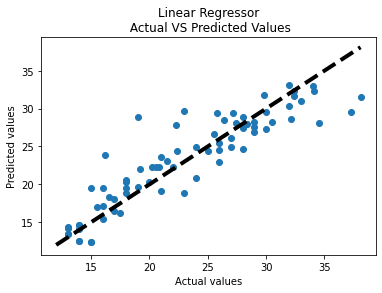

In [ ]:
#Actual vs Predicted plot for Linear Regressor
fig, ax = plt.subplots()
ax.scatter(y_test, LR_predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Linear Regressor\n Actual VS Predicted Values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.show()

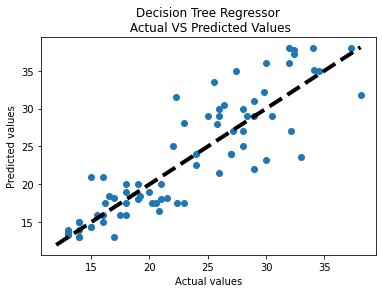

In [ ]:
#Actual vs Predicted plot for Decision Tree Regressor
fig, ax = plt.subplots()
ax.scatter(y_test, DTR_predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Decision Tree Regressor\n Actual VS Predicted Values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.show()

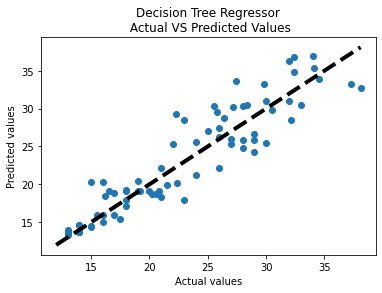

In [ ]:
#Actual vs Predicted plot for Decision Tree Regressor
fig, ax = plt.subplots()
ax.scatter(y_test, RFR_predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Decision Tree Regressor\n Actual VS Predicted Values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.show()

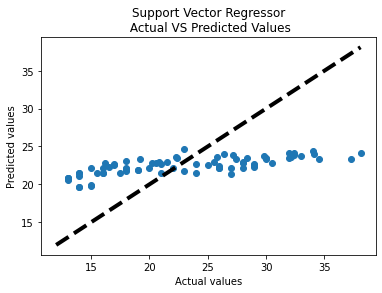

In [ ]:
#Actual vs Predicted plot for Support Vector Regressor
fig, ax = plt.subplots()
ax.scatter(y_test, SVR_predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Support Vector Regressor\n Actual VS Predicted Values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.show()

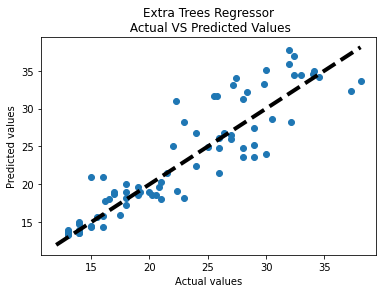

In [ ]:
#Actual vs Predicted plot for Extra Trees Regressor
fig, ax = plt.subplots()
ax.scatter(y_test, ETR_predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Extra Trees Regressor\n Actual VS Predicted Values')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
plt.show()